In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6f6c17237c6dc779b53dc2461d1b4ee6


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dalnegorsk
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | luderitz
Processing Record 7 of Set 1 | fortuna
Processing Record 8 of Set 1 | kholtoson
Processing Record 9 of Set 1 | ingham
Processing Record 10 of Set 1 | yambio
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | qaqortoq
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | bakel
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | altay
Processing Record 18 of Set 1 | coquimbo
Processing Record 19 of Set 1 | coihaique
Processing Record 20 of Set 1 | chokurdakh
Processing Record 21 of Set 1 | severo-kurilsk
Processing Record 22 of Set 1 | port alfred
Processing Record 23 of Set 1 | iquique
Processin

Processing Record 38 of Set 4 | faanui
Processing Record 39 of Set 4 | hofn
Processing Record 40 of Set 4 | arraial do cabo
Processing Record 41 of Set 4 | santa maria
Processing Record 42 of Set 4 | pangnirtung
Processing Record 43 of Set 4 | gympie
Processing Record 44 of Set 4 | torbay
Processing Record 45 of Set 4 | east london
Processing Record 46 of Set 4 | kodiak
Processing Record 47 of Set 4 | najran
Processing Record 48 of Set 4 | kruisfontein
Processing Record 49 of Set 4 | manggar
Processing Record 50 of Set 4 | la macarena
Processing Record 1 of Set 5 | lima
Processing Record 2 of Set 5 | ketchikan
Processing Record 3 of Set 5 | bengkulu
Processing Record 4 of Set 5 | aswan
Processing Record 5 of Set 5 | mnogovershinnyy
Processing Record 6 of Set 5 | hovd
Processing Record 7 of Set 5 | yantal
Processing Record 8 of Set 5 | ola
Processing Record 9 of Set 5 | warrnambool
Processing Record 10 of Set 5 | pierre
Processing Record 11 of Set 5 | narsaq
Processing Record 12 of Set 

Processing Record 28 of Set 8 | iracoubo
Processing Record 29 of Set 8 | verkh-chebula
Processing Record 30 of Set 8 | praia da vitoria
Processing Record 31 of Set 8 | carepa
Processing Record 32 of Set 8 | xiongyue
Processing Record 33 of Set 8 | prince albert
Processing Record 34 of Set 8 | alekseyevsk
Processing Record 35 of Set 8 | jinchang
Processing Record 36 of Set 8 | teya
Processing Record 37 of Set 8 | sao filipe
Processing Record 38 of Set 8 | karaul
City not found. Skipping...
Processing Record 39 of Set 8 | bowen
Processing Record 40 of Set 8 | okhotsk
Processing Record 41 of Set 8 | mount gambier
Processing Record 42 of Set 8 | la uribe
City not found. Skipping...
Processing Record 43 of Set 8 | pacific grove
Processing Record 44 of Set 8 | bubaque
Processing Record 45 of Set 8 | olafsvik
Processing Record 46 of Set 8 | yarmolyntsi
Processing Record 47 of Set 8 | manjacaze
Processing Record 48 of Set 8 | grindavik
Processing Record 49 of Set 8 | arroyo
Processing Record 5

Processing Record 13 of Set 12 | havre-saint-pierre
Processing Record 14 of Set 12 | nuuk
Processing Record 15 of Set 12 | viligili
City not found. Skipping...
Processing Record 16 of Set 12 | batagay-alyta
Processing Record 17 of Set 12 | san cristobal
Processing Record 18 of Set 12 | male
Processing Record 19 of Set 12 | japura
Processing Record 20 of Set 12 | puerto madryn
Processing Record 21 of Set 12 | meulaboh
Processing Record 22 of Set 12 | ambulu
Processing Record 23 of Set 12 | otradnoye
Processing Record 24 of Set 12 | charleville-mezieres
Processing Record 25 of Set 12 | brae
Processing Record 26 of Set 12 | garowe
Processing Record 27 of Set 12 | aksha
Processing Record 28 of Set 12 | zlobin
Processing Record 29 of Set 12 | gazanjyk
Processing Record 30 of Set 12 | nioro
Processing Record 31 of Set 12 | antofagasta
Processing Record 32 of Set 12 | tidore
City not found. Skipping...
Processing Record 33 of Set 12 | ranong
Processing Record 34 of Set 12 | plouzane
Processin

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dalnegorsk,44.5604,135.5701,13.71,93,100,1.86,RU,2021-01-12 23:12:04
1,Albany,42.6001,-73.9662,32.00,71,79,2.86,US,2021-01-12 23:10:04
2,Hermanus,-34.4187,19.2345,71.01,83,87,8.01,ZA,2021-01-12 23:12:04
3,Lebu,-37.6167,-73.6500,56.21,70,32,20.51,CL,2021-01-12 23:12:04
4,Rikitea,-23.1203,-134.9692,77.79,79,5,17.96,PF,2021-01-12 23:12:05
5,Luderitz,-26.6481,15.1594,68.23,74,15,20.60,NA,2021-01-12 23:12:05
6,Fortuna,40.5982,-124.1573,57.99,100,90,17.27,US,2021-01-12 23:12:05
7,Kholtoson,50.2981,103.3097,-15.56,83,84,1.19,RU,2021-01-12 23:12:05
8,Ingham,42.6000,-84.3833,30.20,86,90,3.44,US,2021-01-12 23:12:05
9,Yambio,4.5721,28.3955,71.65,36,38,0.45,SS,2021-01-12 23:12:05


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dalnegorsk,RU,2021-01-12 23:12:04,44.5604,135.5701,13.71,93,100,1.86
1,Albany,US,2021-01-12 23:10:04,42.6001,-73.9662,32.00,71,79,2.86
2,Hermanus,ZA,2021-01-12 23:12:04,-34.4187,19.2345,71.01,83,87,8.01
3,Lebu,CL,2021-01-12 23:12:04,-37.6167,-73.6500,56.21,70,32,20.51
4,Rikitea,PF,2021-01-12 23:12:05,-23.1203,-134.9692,77.79,79,5,17.96
5,Luderitz,NA,2021-01-12 23:12:05,-26.6481,15.1594,68.23,74,15,20.60
6,Fortuna,US,2021-01-12 23:12:05,40.5982,-124.1573,57.99,100,90,17.27
7,Kholtoson,RU,2021-01-12 23:12:05,50.2981,103.3097,-15.56,83,84,1.19
8,Ingham,US,2021-01-12 23:12:05,42.6000,-84.3833,30.20,86,90,3.44
9,Yambio,SS,2021-01-12 23:12:05,4.5721,28.3955,71.65,36,38,0.45


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

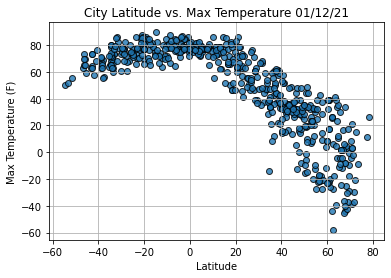

In [13]:
#Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

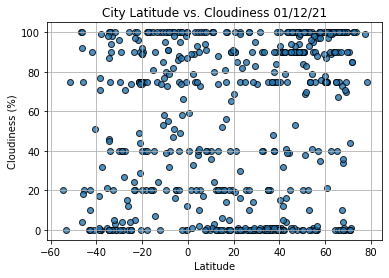

In [14]:
#Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

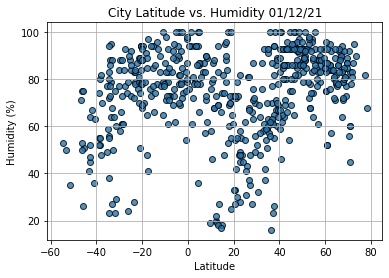

In [15]:
#Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

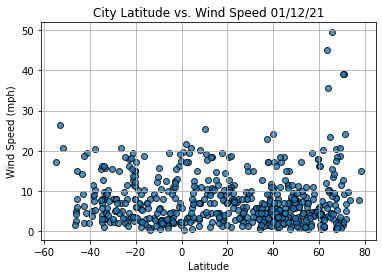

In [16]:
#Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

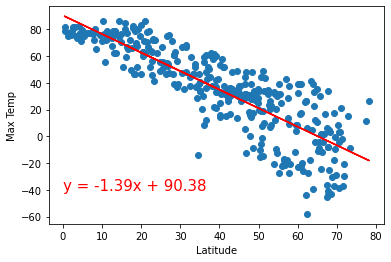

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere\for Maximum Temperature", 'Max Temp',(0,-40))


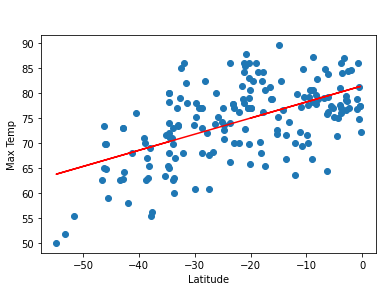

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere\for Maximum Temperature", 'Max Temp',(-55,95))

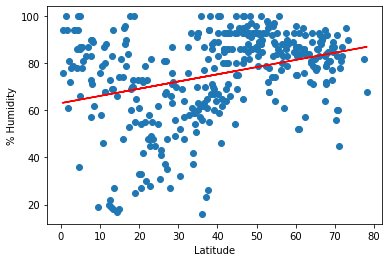

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

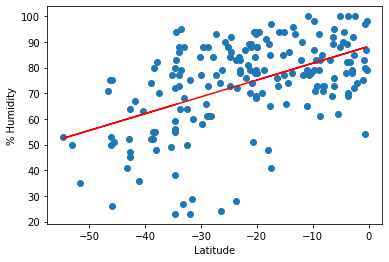

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,15))

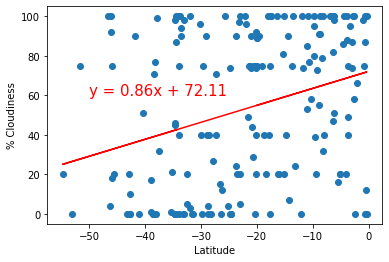

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


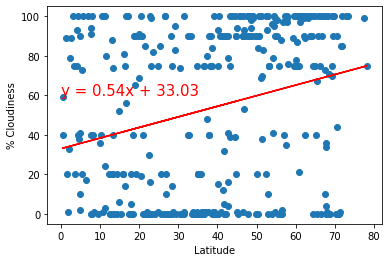

In [24]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,60))


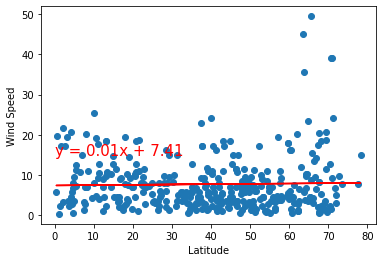

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \for Wind Speed', 'Wind Speed',(0,15))


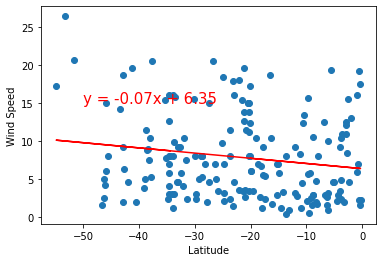

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))